### Classification

(reference Chapter 4 ISLR)

In [3]:
#basic imports

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

We first load in the Student Default database. See the documentation here: https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Default


In [4]:
df = pd.read_excel('Data/Default.xlsx')

df.head()

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='income'>

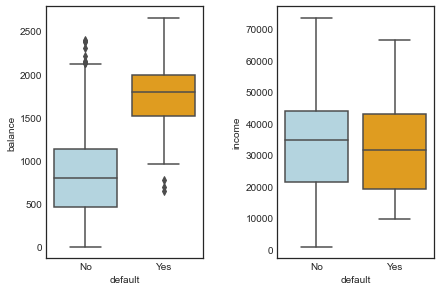

In [7]:
c_palette = {'No':'lightblue', 'Yes':'orange'}

f,(ax1,ax2)=plt.subplots(1,2)
#plt.tight_layout()
plt.tight_layout(pad=1, w_pad=5, h_pad=1.0)
sns.boxplot('default', 'balance', data=df, orient='v',ax=ax1, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v',ax=ax2, palette=c_palette)

In [8]:
#recode the categorical values in default and student columsn to numerals
#by adding the 'default2' and 'student2' columns
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(15)
#verify that No is coded as 0 and Yes = 1

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0
5,6,No,Yes,919.588530,7491.558572,0,1
6,7,No,No,825.513331,24905.226578,0,0
7,8,No,Yes,808.667504,17600.451344,0,1
8,9,No,No,1161.057854,37468.529288,0,0
9,10,No,No,0.000000,29275.268293,0,0


### Logistic Regression (Scikit-Learn)

In [9]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549891]]
intercept : [-10.65132256]


### Logistic Regression (Statsmodel)

In [10]:
X_train = sm.add_constant(df.balance)
est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


### Question 

1. Explain the values obtained especially in relation to the Z and p values
2. Rerun the regression with student2 column. Also explain the results in relation to Z and p.

### Answer
1. The absolute value of the z-statistic of balance is large.  
p-value of balance is small,it means that the variable balance is significant.  
we conclude that there is indeed an association between balance and probability of the response variable.  

2.  The absolute value of the z-statistic of balance is large.  
p-value of student2 is small,it means that the variable student2 is significant.  
we conclude that there is indeed an association between student2 and probability of the response variable.  

In [11]:
X_train_student2 = df.student2.values.reshape(-1,1)

fit2=clf.fit(X_train_student2,y)
print(fit2)

X_train_student2 = sm.add_constant(df.student2)
est = sm.Logit(y, X_train_student2).fit()
est.summary2().tables

LogisticRegression(solver='newton-cg')
Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


[                     0                 1                  2           3
 0               Model:             Logit  Pseudo R-squared:       0.004
 1  Dependent Variable:          default2               AIC:   2912.6831
 2                Date:  2021-12-08 20:18               BIC:   2927.1037
 3    No. Observations:             10000    Log-Likelihood:     -1454.3
 4            Df Model:                 1           LL-Null:     -1460.3
 5        Df Residuals:              9998       LLR p-value:  0.00054161
 6           Converged:            1.0000             Scale:      1.0000
 7      No. Iterations:            7.0000                               ,
              Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
 const    -3.504128  0.070713 -49.554094  0.000000 -3.642723 -3.365532
 student2  0.404887  0.115019   3.520177  0.000431  0.179454  0.630320]

### Multiple Logistic Regression (Statsmodel)

In [12]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.462
 1  Dependent Variable:          default2               AIC:    1579.5448
 2                Date:  2021-12-08 20:18               BIC:    1608.3862
 3    No. Observations:             10000    Log-Likelihood:      -785.77
 4            Df Model:                 3           LL-Null:      -1460.3
 5        Df Residuals:              9996       LLR p-value:  3.2575e-292
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
               Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const    -10.869045  0.492273 -22.079320  4.995499e-108 -11.833882 -9.904209
 balance    0.005737  0.000232  24.736506  4.331521e-135   0.005282  0.006191
 income     0.000003  0.000008   0.369808   7.115254e-01  -0.000013  0.000019
 student2  -0.646776 

### Question 
1. Explain the values obtained especially in relation to the Z and p values above. Also compare the values obtained by single regression of students with the multiple regression.

### Answer
1.Except for imcome , the absolute value of Z value of student2 and balance is large .  
The p-value of balance and student2 are small,and the p-value of income is not small.  
we conclude that there is indeed an association between balance and probability of the response variable.  
we conclude that there is indeed an association between student and probability of the response variable.  
we conclude that there is no association between income and probability of the response variable.  

Compared with the |Z| of student single regression, the Z of multiple regression is a little smaller.  
Compared with the p-value of student single regression, the p-value of multiple regression is a little higher.  
  
Compared with the Pseudo R-squared of single regression of students, the Pseudo R-squared of multiple regression is much higher.  
It means that the performance of multiple regression model is better.  

### Linear Discriminant Analysis


In [61]:
#using scikit-learn
X = df[['balance', 'income', 'student2']].to_numpy()
y = df.default2.to_numpy()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')


True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [62]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



### Question 
The above code uses the entire dataset to perform the fit function (Note: the fit function is where the parameters are learnt). For proper testing and evaluation the training and test data should be separated. Edit the code above so that only training data are used for fit() and predict() uses test data that was not used in training. Print the results out as in the sample above.

1. Comment on the results obtained, i.e. the difference in the results and the reasons for it


### Answer
1. The accuracy after splitting into the test set and training set is similar to the accuracy after using the entire data set for training without splitting.  
Because this model does not need to be trained to adjust parameters, whether the training data and test data are split will not have much impact on the accuracy of the model.  

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

lda = LinearDiscriminantAnalysis(solver='svd')
pred_lda = lda.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred_lda).T)
print(classification_report(y_test, pred_lda, digits=3))

[[1916   58]
 [   7   19]]
              precision    recall  f1-score   support

           0      0.971     0.996     0.983      1923
           1      0.731     0.247     0.369        77

    accuracy                          0.968      2000
   macro avg      0.851     0.622     0.676      2000
weighted avg      0.961     0.968     0.960      2000



### Quadratic Discriminant Analysis

QDA can be performed with code sample as below:
```
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)
```

KNN can be performed with code sample as below:
```
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
```
The output from both can be printed:
```
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))
```

### Question 
Split the dataset into train and test as earlier. Run the QDA and KNN.
1. Compare and comments on the results between LDA,QDA and KNN. 
1. How do we select what K is for KNN? Which K value is best? 




### Answer
1.The accuracy is the largest in LDA and QDA, and the smallest in KNN,So the best model should be LDA and QDA    
2.Do it once for different K values, and see the range of suitable K values by drawing.  
It can be seen from the figure that when the k value is 5, the accuracy is the highest.  
So choose 5 as K value 

In [68]:
qda = QuadraticDiscriminantAnalysis()
pred_qda = qda.fit(X_train,y_train).predict(X_test)

print(confusion_matrix(y_test, pred_qda).T)
print(classification_report(y_test, pred_qda, digits=3))

[[1914   55]
 [   9   22]]
              precision    recall  f1-score   support

           0      0.972     0.995     0.984      1923
           1      0.710     0.286     0.407        77

    accuracy                          0.968      2000
   macro avg      0.841     0.641     0.695      2000
weighted avg      0.962     0.968     0.961      2000



In [69]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pred_knn = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred_knn).T)
print(classification_report(y_test, pred_knn, digits=3))

[[1911   60]
 [  12   17]]
              precision    recall  f1-score   support

           0      0.970     0.994     0.982      1923
           1      0.586     0.221     0.321        77

    accuracy                          0.964      2000
   macro avg      0.778     0.607     0.651      2000
weighted avg      0.955     0.964     0.956      2000



[0.95, 0.9615, 0.9595, 0.963, 0.964, 0.9625, 0.963, 0.962, 0.9615, 0.961, 0.9615, 0.962, 0.962, 0.962, 0.962, 0.962, 0.962, 0.962, 0.962, 0.9615, 0.962, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615, 0.9615]


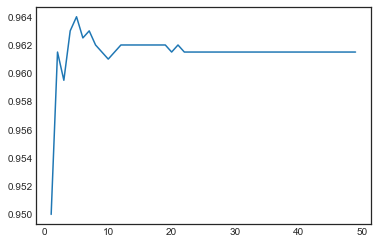

In [70]:
accuracy = []
from sklearn import metrics

for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    k_range = range(1,50)

    
print(accuracy)
plt.plot(k_range, accuracy)
plt.show()